# Using tensorflow

In [1]:
pip install tensorflow opencv-python matplotlib tensorflow-hub


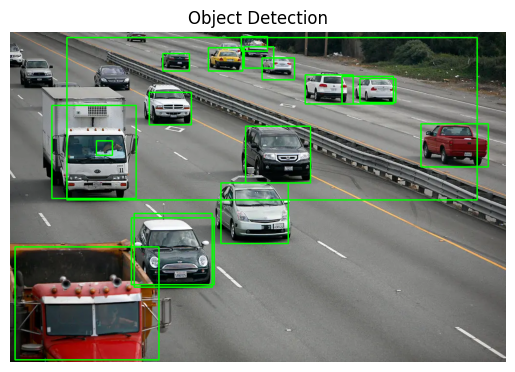

In [6]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a pre-trained SSD MobileNetV2 model from TensorFlow Hub
model = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")

# Load image
img_path = '/content/tr1.webp'  # Change to your image
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(image, (300, 300))  # Model input size
input_tensor = np.expand_dims(img_resized, axis=0)

# Run object detection
detections = model(input_tensor)

# Extract boxes, classes, and scores
boxes = detections['detection_boxes'][0].numpy()
class_ids = detections['detection_classes'][0].numpy().astype(int)
scores = detections['detection_scores'][0].numpy()

# Draw bounding boxes
h, w, _ = image.shape
for i in range(len(boxes)):
    if scores[i] > 0.5:  # Threshold confidence
        y1, x1, y2, x2 = boxes[i]  # Normalized values
        x1, y1, x2, y2 = int(x1 * w), int(y1 * h), int(x2 * w), int(y2 * h)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display results
plt.imshow(image)
plt.axis("off")
plt.title("Object Detection")
plt.show()


# Using Pytorch

In [8]:
pip install ultralytics opencv-python matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 35.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall


0: 448x640 14 cars, 4 trucks, 47.7ms
Speed: 2.9ms preprocess, 47.7ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


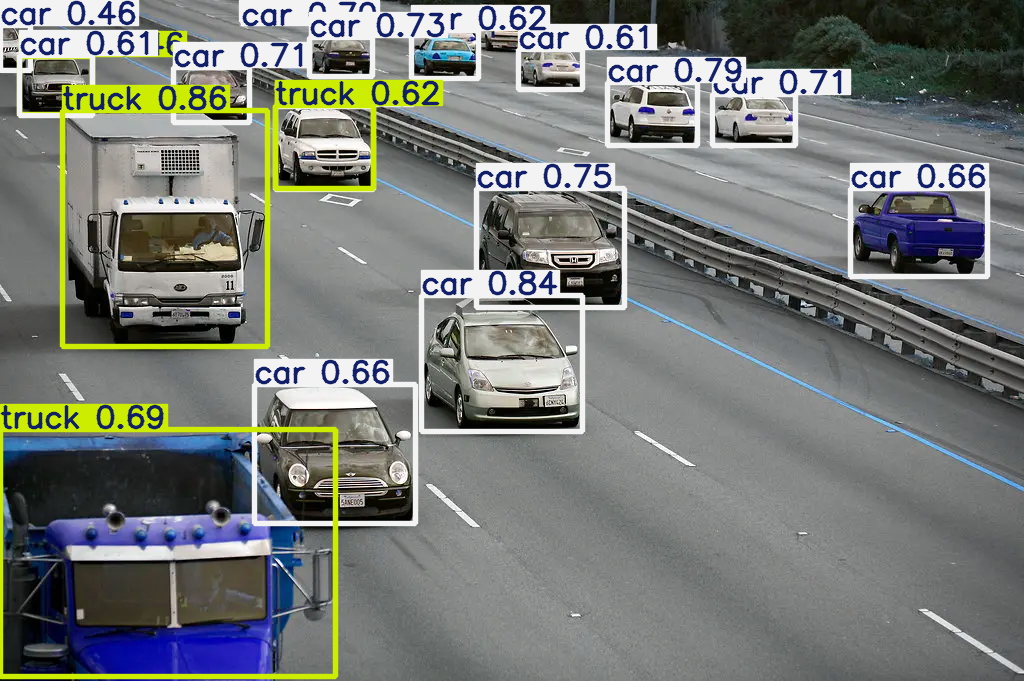

In [10]:
import cv2
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load YOLOv8 pre-trained model
model = YOLO('yolov8n.pt')

# Load image
img_path = '/content/tr1.webp'  # Change to your image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Run object detection
results = model(img)

# Plot results
for result in results:
    result.show()  # Show image with detected objects
